In [21]:
import pandas as pd
from matplotlib_venn import venn2,venn3
import seaborn as sns
import pickle

In [14]:
GenesBased = pd.read_csv('GenesBasedPrediction/All.CPGs.Genes.Results.csv',low_memory=False)
GenesBased = GenesBased.drop('Unnamed: 0', axis=1).sort_values(by='PearsonR',ascending=False).drop_duplicates(subset=['CPG'], keep='first').set_index('CPG').dropna(subset='PearsonR')
GenesBasedTopCpgs =  GenesBased[GenesBased['PearsonR'] > 0.5].index

In [15]:
TranscriptBased = pd.read_csv('Selected.CPGS.csv')
TranscriptBased = TranscriptBased.set_index('CPG')
TranscriptBasedTopCpgs =  TranscriptBased[TranscriptBased['PearsonR'] > 0.5].index

In [29]:
Gtex  = pd.read_csv('GtexBasedPrediction/GTEX.Test.GenesBased.csv')
# sns.displot(Gtex[['PearsonR','Training.Corr']])
# Gtex.sort_values(by='CPG.Var',ascending=False)
Gtex[Gtex['PearsonR'] > 0.4]

,Unnamed: 0,CPG,PearsonR,Training.Corr,CPG.Mean,CPG.Var,Euclidean Distance,MSE,MAE,R2,P.Val,Model,Genes
0,0,cg09676606,0.602431,0.954305,0.939762,0.015900,2.452598,0.011703,0.028466,-4.609176,4.353611e-52,GradientBoosting,"['SYCP3', 'CHPT1']"
1,1,cg27539721,0.516764,0.953935,0.945828,0.008084,1.855618,0.006699,0.027154,-3.898363,1.955937e-36,GradientBoosting,"['SYCP3', 'CHPT1']"
2,2,cg10935064,0.495193,0.949176,0.947465,0.006835,1.726080,0.005796,0.025714,-3.794888,3.735308e-33,GradientBoosting,"['SYCP3', 'CHPT1']"
3,3,cg03136712,0.489046,0.930974,0.950865,0.015024,2.533994,0.012492,0.035367,-9.333989,2.919156e-32,SVR,"['WDR55', 'DND1', 'HARS']"
5,5,cg16011604,0.521563,0.918602,0.935987,0.016076,2.822434,0.015498,0.093385,-15.445470,3.379623e-37,SVR,['DAZL']
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13721,13721,cg13414834,0.490485,0.500044,0.355629,0.010030,2.274082,0.010061,0.076132,-3.941860,1.811142e-32,SVR,"['GPC1', 'PP14571']"
13723,13723,cg03735496,0.405735,0.500033,0.074814,0.010098,2.611106,0.013264,0.096099,-1.905432,8.647674e-22,GradientBoosting,['GREB1L']
13724,13724,cg19309079,0.409154,0.500030,0.736710,0.014147,3.295992,0.021135,0.092780,-0.135729,3.646453e-22,SVR,['GPR39']
13727,13727,cg26470309,0.746656,0.500016,0.511017,0.084387,5.625391,0.061566,0.186444,-1.041396,1.067400e-92,GradientBoosting,['FBXO21']


### GTEX files

In [16]:
import glob
AllCSVs = glob.glob("GtexBasedPrediction/Results.GTEX.prediction/*.csv")
CsvDf = pd.DataFrame()
for csv in AllCSVs:
    try:
        newCSV = pd.read_csv(csv, low_memory=False)
        CsvDf = pd.concat([CsvDf, newCSV])
    except:pass
# CsvDf.to_csv('All.CPGs.Genes.Results.csv', index=True)
CsvDf = CsvDf.drop('Unnamed: 0', axis=1).sort_values(by='PearsonR',ascending=False).drop_duplicates(subset=['CPG'], keep='first').set_index('CPG').dropna(subset='PearsonR')
print("Percent of Extracted CPGs more than 0.5" ,":", (len(CsvDf[CsvDf['PearsonR'] >= 0.5])) / len(CsvDf) * 100, "%")
print("Percent of Extracted CPGs more than 0.4" ,":", (len(CsvDf[CsvDf['PearsonR'] >= 0.4])) / len(CsvDf) * 100, "%")
# CsvDf.loc[:, 'No.Genes'] = CsvDf['Genes'].apply(lambda x: len(x.split(',')))

Percent of Extracted CPGs more than 0.5 : 12.589501809480671 %
Percent of Extracted CPGs more than 0.4 : 20.321543114136826 %


In [ ]:
venn2([set(GenesBasedTopCpgs), set(TranscriptBasedTopCpgs)],['Genes Predicted','Transcripts Predicted'])

In [19]:
GtexBasedTopCpgs = CsvDf[CsvDf['PearsonR'] > 0.5].index

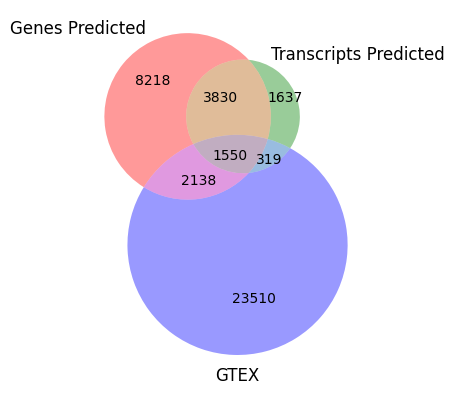

In [22]:
venn3([set(GenesBasedTopCpgs), set(TranscriptBasedTopCpgs), set(GtexBasedTopCpgs)],['Genes Predicted','Transcripts Predicted','GTEX'])